# Reading vertextree

In [1]:
import uproot
import matplotlib.pyplot as plt

Opening vertex tree, getting tree and branches

In [2]:
vtxfile = uproot.open("/eos/user/a/aiulian/sim_fedra/SNDnuyield_30_September_2021/b000022/vertextree.root")
vtxtree = vtxfile["vtx"]

In [3]:
vtxinfo = vtxtree.arrays(["n","MCTrackPdgCode","MCEventID","MCTrackID","MCMotherID","vx","vy","vz","incoming"])

Applying a selection for interesting vertices

In [4]:
#molteplicity requirement
selectedvertices = vtxinfo[vtxinfo["n"] >= 2]
#at least a track with mother ID 0
mothers = selectedvertices["MCMotherID"]
aneutrinodaughter = []
for eventmothers in mothers:
    aneutrinodaughter.append(0 in eventmothers)
    
selectedvertices = selectedvertices[aneutrinodaughter]

In [5]:
reconuvz = selectedvertices["vz"]
reconumolt = selectedvertices["n"]

Text(0.5, 0, 'z[$\\mu m$]')

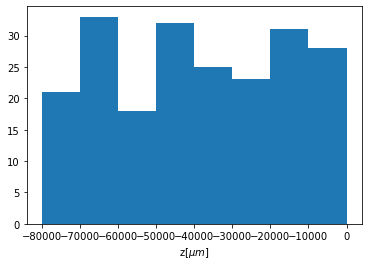

In [6]:
plt.hist(reconuvz,bins=8,range=[-80000,0])
plt.xlabel("z[$\mu m$]")

Text(0.5, 0, 'ntracks')

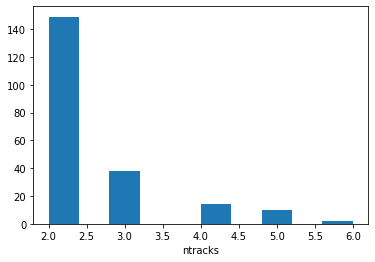

In [7]:
plt.hist(reconumolt)
plt.xlabel("ntracks")

In [8]:
import awkward

Text(0, 0.5, 'y[micron]')

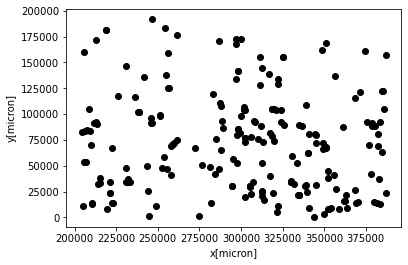

In [9]:
plt.plot(awkward.to_numpy(selectedvertices["vx"]),awkward.to_numpy(selectedvertices["vy"]),"ko");
plt.xlabel("x[micron]")
plt.ylabel("y[micron]")

In [10]:
len(selectedvertices)

213

In [16]:
event = vtxinfo[vtxinfo["MCEventID"][0]==246]

In [17]:
event["n"]

<Array [] type='0 * int32'>